In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\hate dataset.csv")
df.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file_id       10944 non-null  object
 1   user_id       10944 non-null  int64 
 2   subforum_id   10944 non-null  int64 
 3   num_contexts  10944 non-null  int64 
 4   label         10944 non-null  object
dtypes: int64(3), object(2)
memory usage: 427.6+ KB


In [6]:
df.isnull().sum()

file_id         0
user_id         0
subforum_id     0
num_contexts    0
label           0
dtype: int64

In [7]:
df.dtypes

file_id         object
user_id          int64
subforum_id      int64
num_contexts     int64
label           object
dtype: object

In [8]:
df.columns

Index(['file_id', 'user_id', 'subforum_id', 'num_contexts', 'label'], dtype='object')

In [9]:
for i in df:
  print(i)
  print(df[i].unique())
  print(df[i].nunique())
  print('\n')


file_id
['12834217_1' '12834217_2' '12834217_3' ... '33677019_2' '33677053_1'
 '33677053_2']
10944


user_id
[572066 572058 575003 ... 577714 595602 734541]
2792


subforum_id
[1346 1396 1397 1345 1347 1395 1393 1391 1387 1388 1383 1381 1380 1375
 1371 1359 1362 1354 1348 1394 1363]
21


num_contexts
[ 0  1  3  2  4  6  5  7 12 13  9 21 16  8 10 32 15 11 22 18]
20


label
['noHate' 'hate' 'idk/skip' 'relation']
4




In [10]:
df['label']=df['label'].map({'noHate':1 , 'hate':2, 'idk/skip':3,'nan':4})

In [11]:
df

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,1.0
1,12834217_2,572066,1346,0,1.0
2,12834217_3,572066,1346,0,1.0
3,12834217_4,572066,1346,0,2.0
4,12834217_5,572066,1346,0,1.0
...,...,...,...,...,...
10939,33676864_5,734541,1388,0,1.0
10940,33677019_1,735154,1388,0,1.0
10941,33677019_2,735154,1388,0,1.0
10942,33677053_1,572266,1388,0,2.0


In [12]:
df.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,1.0
1,12834217_2,572066,1346,0,1.0
2,12834217_3,572066,1346,0,1.0
3,12834217_4,572066,1346,0,2.0
4,12834217_5,572066,1346,0,1.0


In [13]:
df.isnull().sum()

file_id           0
user_id           0
subforum_id       0
num_contexts      0
label           168
dtype: int64

In [16]:
df['label']

0        1.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
10939    1.0
10940    1.0
10941    1.0
10942    2.0
10943    1.0
Name: label, Length: 10944, dtype: float64

In [26]:
df1=df.dropna()

In [27]:
df1.isnull().sum()

file_id         0
user_id         0
subforum_id     0
num_contexts    0
label           0
dtype: int64

In [33]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [34]:
y

array([1., 1., 1., ..., 1., 2., 1.])

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [36]:
y_train

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [38]:
x_test

array([['14029838_1', 575898, 1387, 0],
       ['14105677_1', 599719, 1381, 0],
       ['14657352_3', 578519, 1371, 0],
       ...,
       ['14300619_1', 572095, 1380, 0],
       ['31711324_1', 589349, 1363, 0],
       ['30550289_2', 577261, 1362, 0]], dtype=object)

In [39]:
y_pred=regressor.predict(x_test)

In [40]:
y_pred

array([1.12303848, 1.12059775, 1.11988082, ..., 1.12193471, 1.11542618,
       1.1160829 ])

In [41]:
y_test

array([2., 1., 1., ..., 1., 2., 1.])

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.012725765810170708

In [44]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)


0.1246345918499539

In [ ]:
##K-MEAN CLUSTERING

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

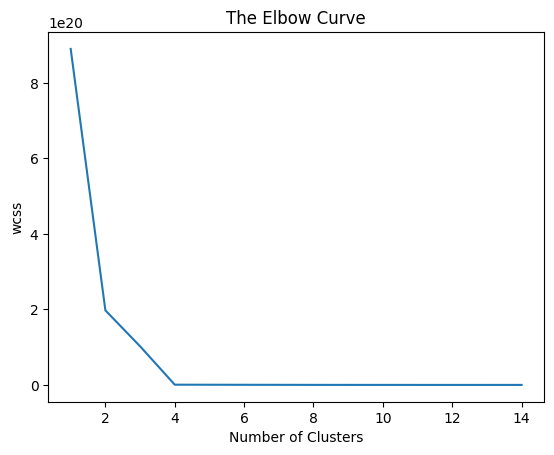

In [52]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()
        



In [56]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,random_state=42)
y_kmeans=kmeans.fit_predict(x)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [57]:
y_kmeans

array([0, 0, 0, ..., 2, 2, 2])

In [58]:
labels=kmeans.labels_

In [59]:
labels

array([0, 0, 0, ..., 2, 2, 2])

In [60]:
cento=kmeans.cluster_centers_
cento

array([[ 1.38648854e+08,  5.81154864e+05,  1.37497657e+03,
         2.75207592e-01],
       [ 3.07639147e+09,  5.77855600e+05,  1.35931765e+03,
        -2.77555756e-17],
       [ 3.09120075e+08,  5.96413398e+05,  1.35986949e+03,
         1.54125584e-01],
       [ 1.41551395e+09,  5.77767975e+05,  1.38162500e+03,
        -2.77555756e-17],
       [ 1.33129836e+09,  5.77355170e+05,  1.36837736e+03,
         4.52830189e-01]])

In [62]:
x[y_kmeans==0, 0]


array(['12834217_1', '12834217_2', '12834217_3', ..., '14678615_2',
       '14678670_1', '14678670_2'], dtype=object)

In [63]:
x[y_kmeans==0,1]

array([572066, 572066, 572066, ..., 580964, 572285, 572285], dtype=object)

In [ ]:
## SVM 

In [64]:
from sklearn.svm import SVC
classifier=SVC(random_state=0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [65]:
y_pred=classifier.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [66]:
y_test

array([2., 1., 1., ..., 1., 2., 1.])

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)

[[2381    0    0]
 [ 290    0    0]
 [  23    0    0]]
0.8838158871566444
